# 군집 모델

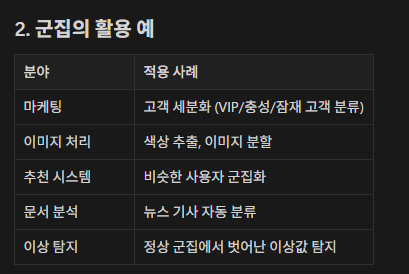

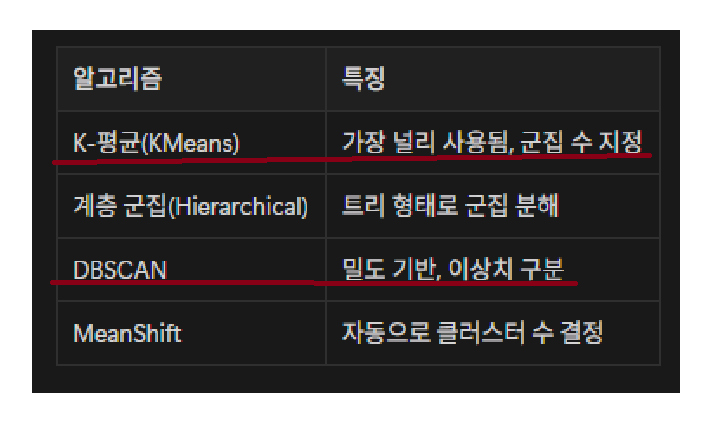

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data

df = pd.DataFrame(X, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# KMeans
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
model.fit(X)
print("클러스터 레이블:", model.labels_)

클러스터 레이블: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


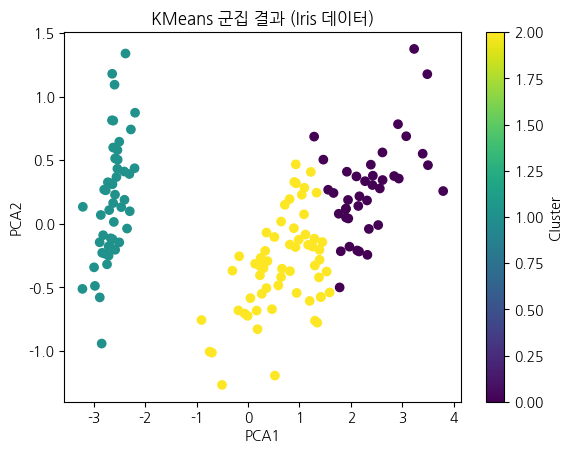

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원으로 축소 - 시각화 및 성능을 위해
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis')
plt.title("KMeans 군집 결과 (Iris 데이터)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()

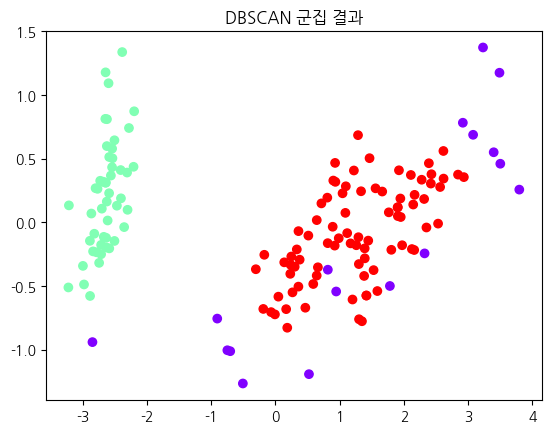

In [7]:
# DBSCAN - 특이케이스에 주로 활용
from sklearn.cluster import DBSCAN

# eps : 점과 점의 거리의 최소 기준
# min_samples : 클러스터로 지정하기 위한 최소 점의 수
model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN 군집 결과")
plt.show()

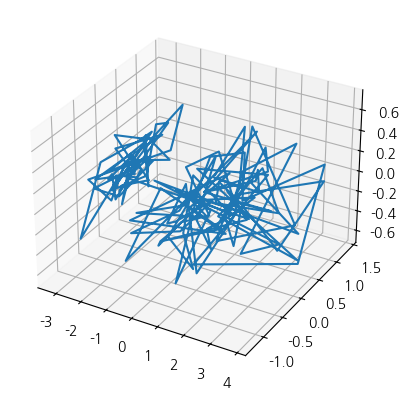

In [8]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3) # 2차원으로 축소 - 시각화 및 성능을 위해
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])